<h1>Current Plot<h1>

<h3>Import<h3>

In [27]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()


<h3>Plot<h3>

Laplace average field: 26.087340419034113 MV/m
Image charge average field: 43.392891941422285 MV/m
RMS: 47.35208883592637 MV/m
Relative RMS: 109.12406783085294 %


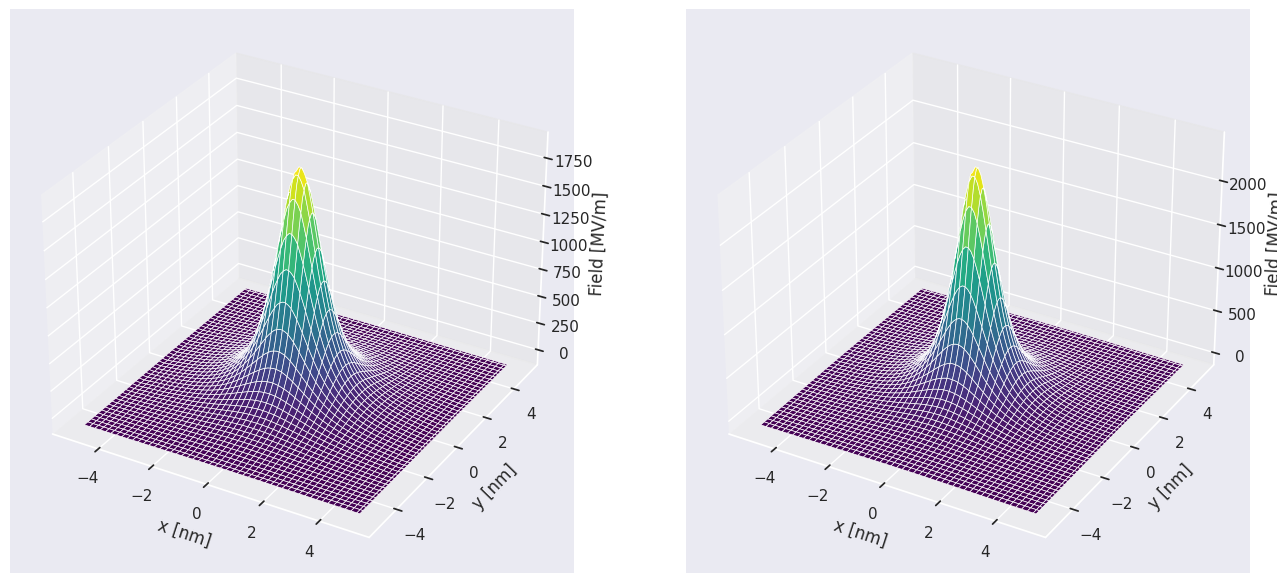

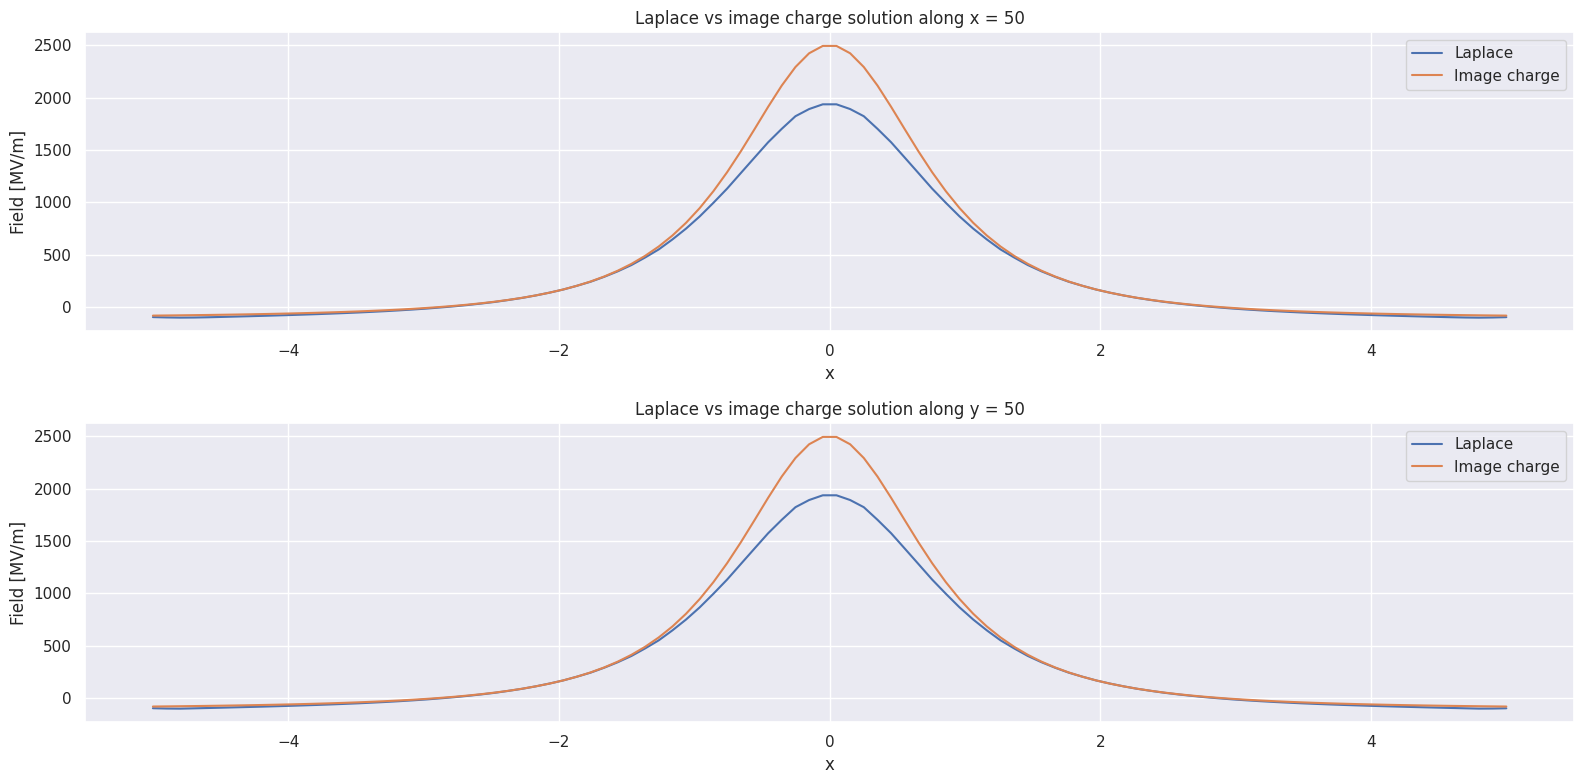

In [28]:
# Memory map file
lp_filename = f'../out/lp_field_0.bin'
lp_dt_abs_type = np.dtype([('i', np.int64), ('j', np.int64), ('field', np.float64), ('emit',np.int64)])
lp_data_mem_abs = np.memmap(lp_filename, dtype=lp_dt_abs_type, mode='r', order='F')
lp_data = pd.DataFrame.from_records(data=lp_data_mem_abs, columns=lp_data_mem_abs.dtype.names)

ic_filename = f'../out/ic_field_0.bin'
ic_dt_abs_type = np.dtype([('i', np.int64), ('j', np.int64), ('field', np.float64), ('emit',np.int64)])
ic_data_mem_abs = np.memmap(ic_filename, dtype=ic_dt_abs_type, mode='r', order='F')
ic_data = pd.DataFrame.from_records(data=ic_data_mem_abs, columns=ic_data_mem_abs.dtype.names)

mse = 0
relative_rms = 0
Nx = 100; Ny = 100
lp_field = np.zeros((Nx,Ny))
ic_field = np.zeros((Nx,Ny))
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
X, Y = np.meshgrid(x,y)
X = X.T; Y = Y.T
for k in range(Nx*Ny):
    i = lp_data['i'][k]
    j = lp_data['j'][k]

    lp_field[i][j] = lp_data['field'][k]*1e-6
    ic_field[i][j] = ic_data['field'][k]*1e-6

    mse += (lp_field[i][j]-ic_field[i][j])**2/(Nx*Ny)
    # print(i,j,lp_field[i][j])

rmse = m.sqrt(mse)

print(f'Laplace average field: {lp_field.mean()} MV/m')
print(f'Image charge average field: {ic_field.mean()} MV/m')
print(f'RMS: {rmse} MV/m')
# print(f'Relative error of averages: {abs((lp_field.mean()-ic_field.mean())/ic_field.mean())*100} %')
print(f'Relative RMS: {rmse/abs(ic_field.mean())*100} %')

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X,Y,lp_field,vmin=lp_field.min(),vmax=lp_field.max(),cmap='viridis',linewidth=0.5, antialiased=True)
# ax1.set_title('Laplace solution')
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('y [nm]')
ax1.set_zlabel('Field [MV/m]')
ax2 = fig.add_subplot(122,projection='3d')
ax2.plot_surface(X,Y,ic_field,vmin=ic_field.min(),vmax=ic_field.max(),cmap='viridis',linewidth=0.5, antialiased=True)
# ax2.set_title('Image charge solution')
ax2.set_xlabel('x [nm]')
ax2.set_ylabel('y [nm]')
ax2.set_zlabel('Field [MV/m]')
plt.show()


x_index = Nx//2
y_index = Ny//2

lp_x_data = [lp_field[x_index][j] for j in range(Ny)]
ic_x_data = [ic_field[x_index][j] for j in range(Ny)]
lp_y_data = [lp_field[i][y_index] for i in range(Nx)]
ic_y_data = [ic_field[i][y_index] for i in range(Nx)]

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
ax1.set_title(f'Laplace vs image charge solution along x = {x_index}')
ax1.plot(x,lp_x_data,label='Laplace')
ax1.plot(x,ic_x_data,label='Image charge')
ax1.set_xlabel('x')
ax1.set_ylabel('Field [MV/m]')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_title(f'Laplace vs image charge solution along y = {y_index}')
ax2.plot(y,lp_y_data,label='Laplace')
ax2.plot(y,ic_y_data,label='Image charge')
ax2.set_xlabel('x')
ax2.set_ylabel('Field [MV/m]')
ax2.legend()

plt.tight_layout()
plt.show()


In [29]:
# filename_field = './out/laplace_grid.dt'
# df_field = pd.read_csv(filepath_or_buffer=filename_field,delim_whitespace=True, \
#                        header=None, names=['emit','x','y','z'])
# fig, ax = plt.subplots(figsize=(10, 6))
# for i in range(len(df_field['emit'])):
#     color = 'r'
#     if df_field['emit'][i] == 0: color = 'b'
#     ax.scatter(df_field['x'][i], df_field['y'][i], c=color, s=5, alpha=0.5)
# plt.show()